In [15]:
import pandas as pd
import numpy as np
import sklearn 
import keras
from six.moves import urllib

* Read the link bellow to get data description.

https://archive.ics.uci.edu/ml/datasets/Automobile

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url)

In [3]:
df.to_csv("automobile.csv")

In [4]:
df.columns = ["symboling", "normalized-losses", "make", "fuel-type",
              "aspiration", "num-of-doors", "body-style", "drive-wheels", 
              "engine-location","wheel-base", "length", "width",
              "height","curb-weight","engine-type","num-of-cylinders",
              "engine-size","fuel-system","bore","stroke", 
              "compression-ratio","hourse-power","peak-rpm","city-mpg",
              "highway-mpg","price"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,hourse-power,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [7]:
#check missing by df.info()
print(
      df["make"].value_counts(),"\n-------------------------\n",
      df["fuel-type"].value_counts(),"\n-------------------------\n",
      df["aspiration"].value_counts(),"\n-------------------------\n",
      df["num-of-doors"].value_counts(),"\n-------------------------\n",
      df["body-style"].value_counts(),"\n-------------------------\n",
      df["drive-wheels"].value_counts(),"\n-------------------------\n",
      df["engine-location"].value_counts(),"\n-------------------------\n",
      df["engine-type"].value_counts(),"\n-------------------------\n",
      df["fuel-system"].value_counts(),"\n-------------------------\n"
      )

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64 
-------------------------
 gas       184
diesel     20
Name: fuel-type, dtype: int64 
-------------------------
 std      167
turbo     37
Name: aspiration, dtype: int64 
-------------------------
 four    114
two      88
?         2
Name: num-of-doors, dtype: int64 
-------------------------
 sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     5
Name: body-style, dtype: int64 
-------------------------
 fwd    120
rwd     75
4wd      9
Name: drive-wheels, dtype: int64 
-----------------------

In [18]:
import numpy as np
#Fill missing values 
#split into 3 types, each type will be processed separately
CATEGORICAL_COLUMN_NAMES=["make","fuel-type","aspiration","body-style",
                          "drive-wheels","engine-location",
                          "engine-type","fuel-system",]

CATEGORY_2_NUMBER_NAMES=["num-of-doors","num-of-cylinders"]

NUMBERIC_COLUMN_NAMES=["symboling","normalized-losses",
                       "wheel-base","length","width",
                       "height","curb-weight","engine-size",
                       "bore","stroke","compression-ratio",
                       "peak-rpm","city-mpg","highway-mpg","price"]
#Process NUMBERIC_COLUMN_NAMES
for col in NUMBERIC_COLUMN_NAMES:
  #1st step. fill missing values by mode 
  df.loc[df[col]=="?",col]=np.NaN
  df.loc[:,col].fillna(df[col].median(),inplace=True)
  df.loc[:,col] = df.loc[:,col].astype('float64')
  #print(pd_copy[col])
  max = np.max(df[col])
  mean_col = df[col].mean()

#Process categorical list
#1st step. Fill nan or ? with highest freq category
for col in CATEGORICAL_COLUMN_NAMES:
  highest_freq_value = df[col].mode()
  df.loc[df[col]=="?",col]=highest_freq_value

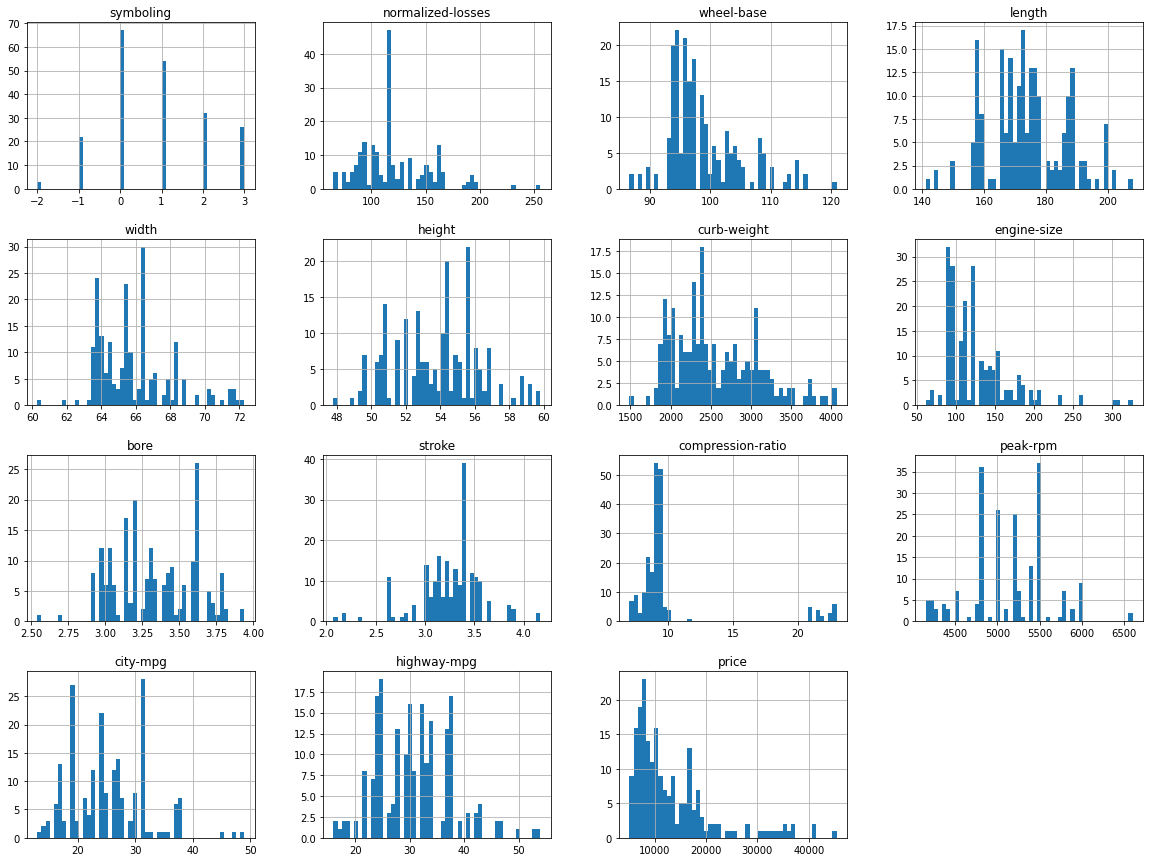

In [19]:
# only in a Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
corr_matrix = df.corr()

In [23]:
corr_matrix["price"].sort_values(ascending=False)

price                1.000000
engine-size          0.860321
curb-weight          0.819806
width                0.725971
length               0.686992
wheel-base           0.589365
bore                 0.533105
height               0.142356
normalized-losses    0.095543
stroke               0.084744
compression-ratio    0.072983
symboling           -0.081113
peak-rpm            -0.107293
city-mpg            -0.669376
highway-mpg         -0.693444
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2d5422c50>,
      dtype=object)

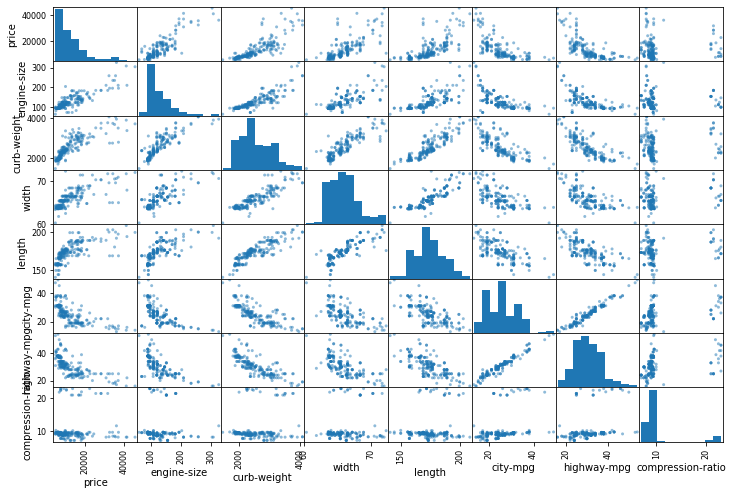

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["price","engine-size","curb-weight","width","length","city-mpg","highway-mpg","compression-ratio"]
scatter_matrix(df[attributes], figsize=(12, 8))

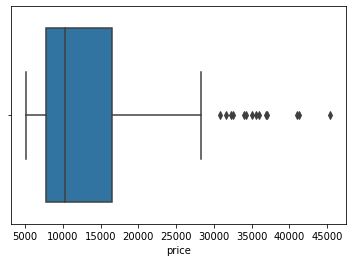

In [28]:
import seaborn as sns
sns.boxplot(x=df["price"])

In [29]:
#using plotly to show price vs category attributes

CATEGORICAL_COLUMN_NAMES=["make","fuel-type","aspiration","body-style",
                          "drive-wheels","engine-location",
                          "engine-type","fuel-system",]




In [51]:
import plotly.graph_objects as go

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']

fig = go.Figure()
for color,category in zip(colors,df["fuel-type"].unique()):
  print(category)
  fig.add_trace(go.Box(
      y=df.loc[df["fuel-type"]==category]["price"],
      name=category,
      fillcolor=color,
      boxmean='sd' # represent mean
))
fig.update_layout(title_text="price/fuel-type")
fig.show()

gas
diesel


In [52]:
fig = go.Figure()
for color,category in zip(colors,df["aspiration"].unique()):
  print(category)
  fig.add_trace(go.Box(
      y=df.loc[df["aspiration"]==category]["price"],
      name=category,
      fillcolor=color,
      boxmean='sd' # represent mean
))
fig.update_layout(title_text="price/aspiration")
fig.show()

std
turbo


In [53]:
fig = go.Figure()
for color,category in zip(colors,df["body-style"].unique()):
  print(category)
  fig.add_trace(go.Box(
      y=df.loc[df["body-style"]==category]["price"],
      name=category,
      fillcolor=color,
      boxmean='sd' # represent mean
))
fig.update_layout(title_text="price/body-style")
fig.show()

convertible
hatchback
sedan
wagon
hardtop


In [54]:
fig = go.Figure()
for color,category in zip(colors,df["drive-wheels"].unique()):
  #print(category)
  fig.add_trace(go.Box(
      y=df.loc[df["drive-wheels"]==category]["price"],
      name=category,
      fillcolor=color,
      boxmean='sd' # represent mean
))
fig.update_layout(title_text="price/drive-wheels")
fig.show()

In [55]:
fig = go.Figure()
for color,category in zip(colors,df["engine-location"].unique()):
  #print(category)
  fig.add_trace(go.Box(
      y=df.loc[df["engine-location"]==category]["price"],
      name=category,
      fillcolor=color,
      boxmean='sd' # represent mean
))
fig.update_layout(title_text="price/engine-location")
fig.show()

In [56]:
fig = go.Figure()
for color,category in zip(colors,df["engine-type"].unique()):
  #print(category)
  fig.add_trace(go.Box(
      y=df.loc[df["engine-type"]==category]["price"],
      name=category,
      fillcolor=color,
      boxmean='sd' # represent mean
))
fig.update_layout(title_text="price/engine-type")
fig.show()

In [57]:
fig = go.Figure()
for color,category in zip(colors,df["fuel-system"].unique()):
  #print(category)
  fig.add_trace(go.Box(
      y=df.loc[df["fuel-system"]==category]["price"],
      name=category,
      fillcolor=color,
      boxmean='sd' # represent mean
))
fig.update_layout(title_text="price/fuel-system")
fig.show()

#Assignments:


* You need to complete at least 5 questions to get 10.

* Most of the code is written with pandas. Therefore, you need to learn pandas to complete this task.

* Any cheat or plagiarism is highly critised as I do hope you can gain some insights whilst working on the task.

* Hope you enjoy our material coz I took lots of time to design it ^^

In [ ]:
#Assignment 1: Show 2 records of the highest and lowest price ( 2 points)
#Assignment 2: Show records of top 5 city-mpg cars (2 points)
#Assignment 3: Show records of 5 random Poscher cars (2 points)
#Assignment 4: Filter a subset of data where price > 30k $ (2 points)
#Assignment 5: Group this data into groups base on engine-type ( 2 points)
#Assignment 6: Group data into groups base on body-type, count how many cars of each type ( 2 points)
#Assignment 7: Create a new 'feature' or column named area so that area = width*height ( 2 points)
#Assignment 8: Verify correlation between area and price ( 2 points)